<a href="https://colab.research.google.com/github/HosseinEyvazi/Deep-Learning/blob/main/RNNs%2C_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### **Recurrent Neural Networks (RNNs): The Sequential Memory**
**Core Concept:**  
RNNs process sequential data (text, time series) using a *hidden state* that acts as memory, retaining information from previous steps.  

**Key Architecture:**  
- Input → Hidden State (updated at each step) → Output  
- Hidden state: `h_t = f(W·x_t + U·h_{t-1} + b)`  

**Critical Problems:**  
1. **Vanishing Gradients**  
   - Gradients shrink exponentially during backpropagation through time  
   - **Result:** Early inputs are "forgotten"; model underfits long sequences  
2. **Exploding Gradients**  
   - Gradients grow exponentially, causing unstable updates  
   - **Result:** Overfitting, erratic behavior (NaN errors)  

---

### **LSTM: Long(er) Short-Term Memory**
**Innovation:** Solves vanishing/exploding gradients via *gated memory cells*.  

**Core Components:**  
1. **Cell State** (`C_t`):  
   - Highway for long-term memory (gradients flow unchanged)  
2. **Gates (Regulate Information Flow):**  
   - **Forget Gate:** `f_t = σ(W_f·[h_{t-1}, x_t] + b_f)`  
     → *Decides what to discard from cell state*  
   - **Input Gate:** `i_t = σ(W_i·[h_{t-1}, x_t] + b_i)`  
     → *Selects new information to store*  
   - **Output Gate:** `o_t = σ(W_o·[h_{t-1}, x_t] + b_o)`  
     → *Controls what to output from cell state*  

**How It Solves RNN Issues:**  
- Additive cell state updates avoid gradient decay/explosion  
- Selective forgetting/remembering preserves long-range dependencies  

**Trade-off:**  
✅ Handles longer sequences than RNNs  
❌ Highly complex (4x RNN parameters) → **Requires large datasets** to avoid overfitting  

---

### **GRU: Gated Recurrent Unit**
**Goal:** Simplify LSTM while preserving performance.  

**Key Changes from LSTM:**  
1. **Combined Gates:**  
   - Merges forget/input gates into *Update Gate*: `z_t = σ(W_z·[h_{t-1}, x_t])`  
2. **Reset Gate:** `r_t = σ(W_r·[h_{t-1}, x_t])`  
   → Controls how much past info to ignore  
3. **No Cell State:**  
   - Uses hidden state `h_t` directly for memory  

**Simplified Architecture:**  
```  
h̃_t = tanh(W·[r_t ⊙ h_{t-1}, x_t])  
h_t = (1 - z_t) ⊙ h_{t-1} + z_t ⊙ h̃_t  
```  

**Advantages over LSTM:**  
✅ Fewer parameters (3 gates → 2 gates) → **Less prone to overfitting**  
✅ Computationally faster  
✅ Matches LSTM performance on most tasks  

**Solves LSTM Issues:**  
- Reduced complexity → Better generalization on small/medium datasets  
- Unified update mechanism → Easier optimization  

---

### **Evolution Summary**
| **Model** | **Key Innovation**                  | **Solves**                     | **Weakness**               |
|-----------|-------------------------------------|--------------------------------|----------------------------|
| RNN       | Hidden state memory                 | Basic sequence modeling        | Vanishing/exploding grads  |
| LSTM      | Gated cell state                    | Long-term dependencies         | Overfitting (high complexity) |
| GRU       | Simplified gates (update/reset)     | LSTM complexity & efficiency   | Slightly less long-memory  |

**Practical Guidance:**  
- Use **GRUs** for efficiency on small datasets  
- Use **LSTMs** for tasks requiring very long memory (with ample data)  
- **Transformers** (next!) dominate modern NLP but require huge data/resources  

---

### **Transformers: Context is King**  
*(Continued from RNNs/LSTMs/GRUs)*  

---

### **Step 0: Word Embeddings Evolution**  
Before Transformers, word representation evolved through:  
1. **Categorical Embeddings**  
   - *Bag-of-Words (BoW)*: Count word frequencies (ignores order).  
   - *One-Hot Encoding*: `[0,...,1,...,0]` (sparse, high-dimension).  
   - ❌ **No semantic meaning**, "king" ≠ "queen".  

2. **Statistical Embeddings**  
   - *TF-IDF*: Weights words by importance in documents.  
   - ✅ Better than BoW but still **no context awareness**.  

3. **Dense Vector Embeddings (Neural)**  
   - *Word2Vec/GloVe*: Map words to ~300D vectors.  
   - ✅ Solves **semantic relationships**: `king - man + woman ≈ queen`.  
   - ❌ **Static meaning**: "bank" (river) = "bank" (finance).  

4. **Context-Aware Embeddings (Transformers)**  
   - *BERT/GPT*: Same word → **different vectors based on context**.  
   - ✅ "I *present* a gift" vs. "I am *present*" → unique embeddings.  



### 🔹 Word Embeddings: Traditional vs. Transformers

* In **Transformers**, word embeddings are **learned during training** as part of the model (e.g., BERT, GPT). Each token is mapped to a vector from an embedding matrix that gets updated via backpropagation.

* In **traditional models** (like Logistic Regression, SVM, etc.), we often use **fixed embeddings** like:

  * **TF-IDF**
  * **Bag-of-Words**
  * **Word2Vec (pretrained)**
    These are **not learnable** during model training.



---

### **Step 1: Tokenization**  
Transformers break text into **subword tokens** (not whole words):  
- **Why?** Handles rare words, morphology, and cross-lingual text.  
- **Example**:  
  - `"active", "action", "activate"` → Tokens: `["act", "##ive", "##ion", "##ate"]`  
  - "##" = suffix marker.  

**N-grams** (pre-Transformer technique):  
- *Bigram*: Pairs ("the cat", "cat sat")  
- *Trigram*: Triples ("the cat sat")  
- ❌ **Inefficient**: Explodes vocabulary size.  

---

### **Transformers Architecture**  
Uses **encoder-decoder** stacks (no recurrence!):  
- **Encoder (left)**: Understands input (e.g., English text).  
- **Decoder (right)**: Generates output (e.g., Persian translation).  

#### **Component 1: Inputs & Outputs**  
- **Input (Encoder)**: Source sequence (e.g., *"Transformers learn from data"*).  
- **Output (Decoder Input)**: Target sequence **shifted right** with start token:  
  - `[START] ترنسفورمر ها از داده ها یاد میگیرند`  
  ❗ *Why shift?* Decoder must predict *next* token, not cheat by seeing it.  

**Problem**: During training, if the decoder sees the *full* target output (e.g., Persian translation), it could "cheat" by using future words to predict current ones.  

**Solution**: **Shift the decoder input right** by adding a `[START]` token and removing the last token.  

**Example**:  

| Step | Decoder Input          | Encoder Input (Fixed)       | Prediction       |
|------|------------------------|-----------------------------|------------------|
| 1    | `[START]`              | `"Transformers learn from data"` | `ترنسفورمر`     |
| 2    | `[START] ترنسفورمر`   | `"Transformers learn from data"` | `ها`            |
| 3    | `[START] ترنسفورمر ها`| `"Transformers learn from data"` | `از`            |
|...| |


**Why this works**:  
- Forces decoder to learn **causal relationships** (only past → future)  
- Mimics real inference where future tokens are unknown  






#### **Component 2: Embeddings**  
- Convert tokens to vectors:  
  ```python
  # Example: "learn" → Vector
  "learn" = [0.24, -0.72, ..., 1.6]  # (512-dimensional)
  ```  
- **Shared weights**: Input/output embeddings often use same lookup table.  

### **Component 3: Positional Encoding Demystified**  
**Core Problem**: Transformers process words in parallel → loses sequential order.  

**Key Variables**:  
- `pos`: Position of word in sentence (0-indexed)  
- `d_model`: Embedding dimension size (e.g., 512 in original Transformer)  
- `i`: Index within embedding vector (0 ≤ i < d_model)  

#### **Formula**:  
For each position `pos` and dimension `i`:  
- **Even indices** (i = 0, 2, 4,...):  
  `PE(pos, i) = sin(pos / 10000^(i / d_model))`  
- **Odd indices** (i = 1, 3, 5,...):  
  `PE(pos, i) = cos(pos / 10000^((i-1)/d_model))`  

#### **Step-by-Step Example**:  
**Sentence**: `"Data learn"` (2 words)  
**Assume**: `d_model = 4` (tiny for demonstration)  

1. **Word Positions**:  
   - `"Data"` → pos = 0  
   - `"learn"` → pos = 1  

2. **Compute PE for "Data" (pos=0)**:  


   | `i` | Formula                            | Value          |  
   |-----|------------------------------------|----------------|  
   | 0   | `sin(0 / 10000^(0/4)) = sin(0)`   | **0.0000**     |  
   | 1   | `cos(0 / 10000^(0/4)) = cos(0)`   | **1.0000**     |  
   | 2   | `sin(0 / 10000^(2/4)) = sin(0)`   | **0.0000**     |  
   | 3   | `cos(0 / 10000^(2/4)) = cos(0)`   | **1.0000**     |  
   → PE(`"Data"`) = `[0.0, 1.0, 0.0, 1.0]`  

3. **Compute PE for "learn" (pos=1)**:  


   | `i` | Formula                                  | Value          |  
   |-----|------------------------------------------|----------------|  
   | 0   | `sin(1 / 10000^(0/4)) = sin(1)`         | **0.8415**     |  
   | 1   | `cos(1 / 10000^(0/4)) = cos(1)`         | **0.5403**     |  
   | 2   | `sin(1 / 10000^(2/4)) = sin(1/100)`     | **0.0100**     |  
   | 3   | `cos(1 / 10000^(2/4)) = cos(1/100)`     | **0.9999**     |

→ PE(`"learn"`) = `[0.8415, 0.5403, 0.0100, 0.9999]`  

#### **Why Sine/Cosine?**  
1. **Unique Encoding**: Every position has a distinct pattern  
2. **Relative Positions**: Model can learn relationships like:  
   `PE(pos+k) ≈ linear_function(PE(pos))`  
   → Understands *"word 3 comes after word 1"*  
3. **Bounded Values**: Stays between [-1,1] (stable training)  

#### **Final Input Representation**:  
Combine token embedding + positional encoding:  
- `"Data"` embedding: `[0.2, -0.5, 1.1, 0.7]`  
- Add PE: `[0.2+0.0, -0.5+1.0, 1.1+0.0, 0.7+1.0] = [0.2, 0.5, 1.1, 1.7]`  

---

### **Key Insight So Far**  
Transformers solved the **long-range dependency problem** of RNNs/LSTMs:  
- No recurrence → **parallel processing** (faster training).  
- Positional encoding → **understands word order**.  
- Up next: Self-attention (where context truly shines!).  


### **Component 4: Self-Attention - Where Context Comes Alive**

**Core Idea**:  
Self-Attention allows each word to "look" at other words in the sequence to build context-aware representations. Unlike RNNs, it does this in parallel!

---

#### **The QKV Triad: Query, Key, Value**
Imagine you're searching for a book in a library:
- **Query (Q)**: Your question ("Find books about space exploration")
- **Key (K)**: Book titles/catalog IDs (what matches your query?)
- **Value (V)**: Actual book content (what you get after matching)

**In Transformers**:  
1. Each token gets 3 vectors via linear layers (learnable projections):
   ```python
   Q = input • W_q   # What I'm looking for
   K = input • W_k   # What I contain
   V = input • W_v   # My actual content
   ```

---

#### **Attention Calculation Step-by-Step**
**Example Sequence**: `["Astronauts", "explore", "Mars"]`  
Assume `d_k = 2` (tiny dimension for demo):

1. **Compute Scores (Affinity Matrix)**  
   How much should "explore" attend to "Astronauts" vs "Mars"?  
   ```
   Scores = Q • K^T
   ```


   |          | Astronauts | explore | Mars |
   |----------|------------|---------|------|
   |**Astronauts**| 3.2       | 1.1     | 0.3  |
   |**explore**| 1.8       | 4.5     | 2.1  |
   |**Mars**  | 0.9       | 1.7     | 3.8  |

  Note that this matrix is not symmetric!

2. **Scale Scores**  
   Prevent exploding values: `Scaled = Scores / sqrt(d_k) = Scores / √2 ≈ Scores/1.41`  


   |          | Astronauts | explore | Mars |
   |----------|------------|---------|------|
   |**Astronauts**| 2.27      | 0.78    | 0.21 |
   |**explore**| 1.28      | 3.19    | 1.49 |
   |**Mars**  | 0.64      | 1.20    | 2.69 |

3. **Softmax (Attention Weights)**  
   Convert scores to probabilities (row-wise):  
   ```
   Softmax(row) = e^value / sum(e^values)
   ```


   |          | Astronauts | explore | Mars |  
   |----------|------------|---------|------|
   |**Astronauts**| 0.76      | 0.18    | 0.06 | ← Focuses mostly on itself  
   |**explore**| 0.18      | 0.70    | 0.12 | ← Primarily attends to itself  
   |**Mars**  | 0.08      | 0.20    | 0.72 | ← Mostly self-attention  

4. **Output = Weights • Value**  
   New context-rich representation:  
   `Z = Attention_Weights • V`  
   For "explore":  
   `= 0.18*V_astronauts + 0.70*V_explore + 0.12*V_Mars`  

---

#### **Why "Self"-Attention?**
- **Self**: Queries, Keys, Values all come from the SAME sequence  
- Each token reinvents itself based on siblings:  
  `"bank" river → [0.2, 1.7, ...]`  
  `"bank" finance → [1.8, 0.3, ...]`  

---

#### **Multi-Head Attention: Multiple Perspectives**
Like having 8 different librarians search simultaneously:  
1. Split Q/K/V into 8 heads (e.g., 512D → 8×64D)  
2. Compute attention independently per head  
3. Concatenate results → richer representation  

**Why?**  
- Head 1 might learn *subject-verb* relationships  
- Head 2 might capture *adjective-noun* agreements  
- Head 3 could track *entity locations*  

---

#### **Masked Attention (Decoder Only)**
**Problem**: During generation, future tokens shouldn't be visible.  
**Solution**: Mask future positions (`-inf` in score matrix)  
**Example for "explore"**:  


|          | Astronauts | explore | Mars |  
|----------|------------|---------|------|
|**explore**| 1.28      | 3.19    | **-∞** | ← Can't see "Mars"  

**Why?**  
- Prevents cheating during training  
- Simulates real generation (left-to-right)  

---

### **Key Innovations**  
1. **Parallel Processing**: No sequential dependency → faster than RNNs  
2. **Context Awareness**: "Present" ≠ "present" (finance vs gift)  
3. **Long-Range Handling**: Direct token-to-token links solve vanishing gradients  

> "Self-attention is the ultimate networking event – every word chats with every other word simultaneously!"  

---  


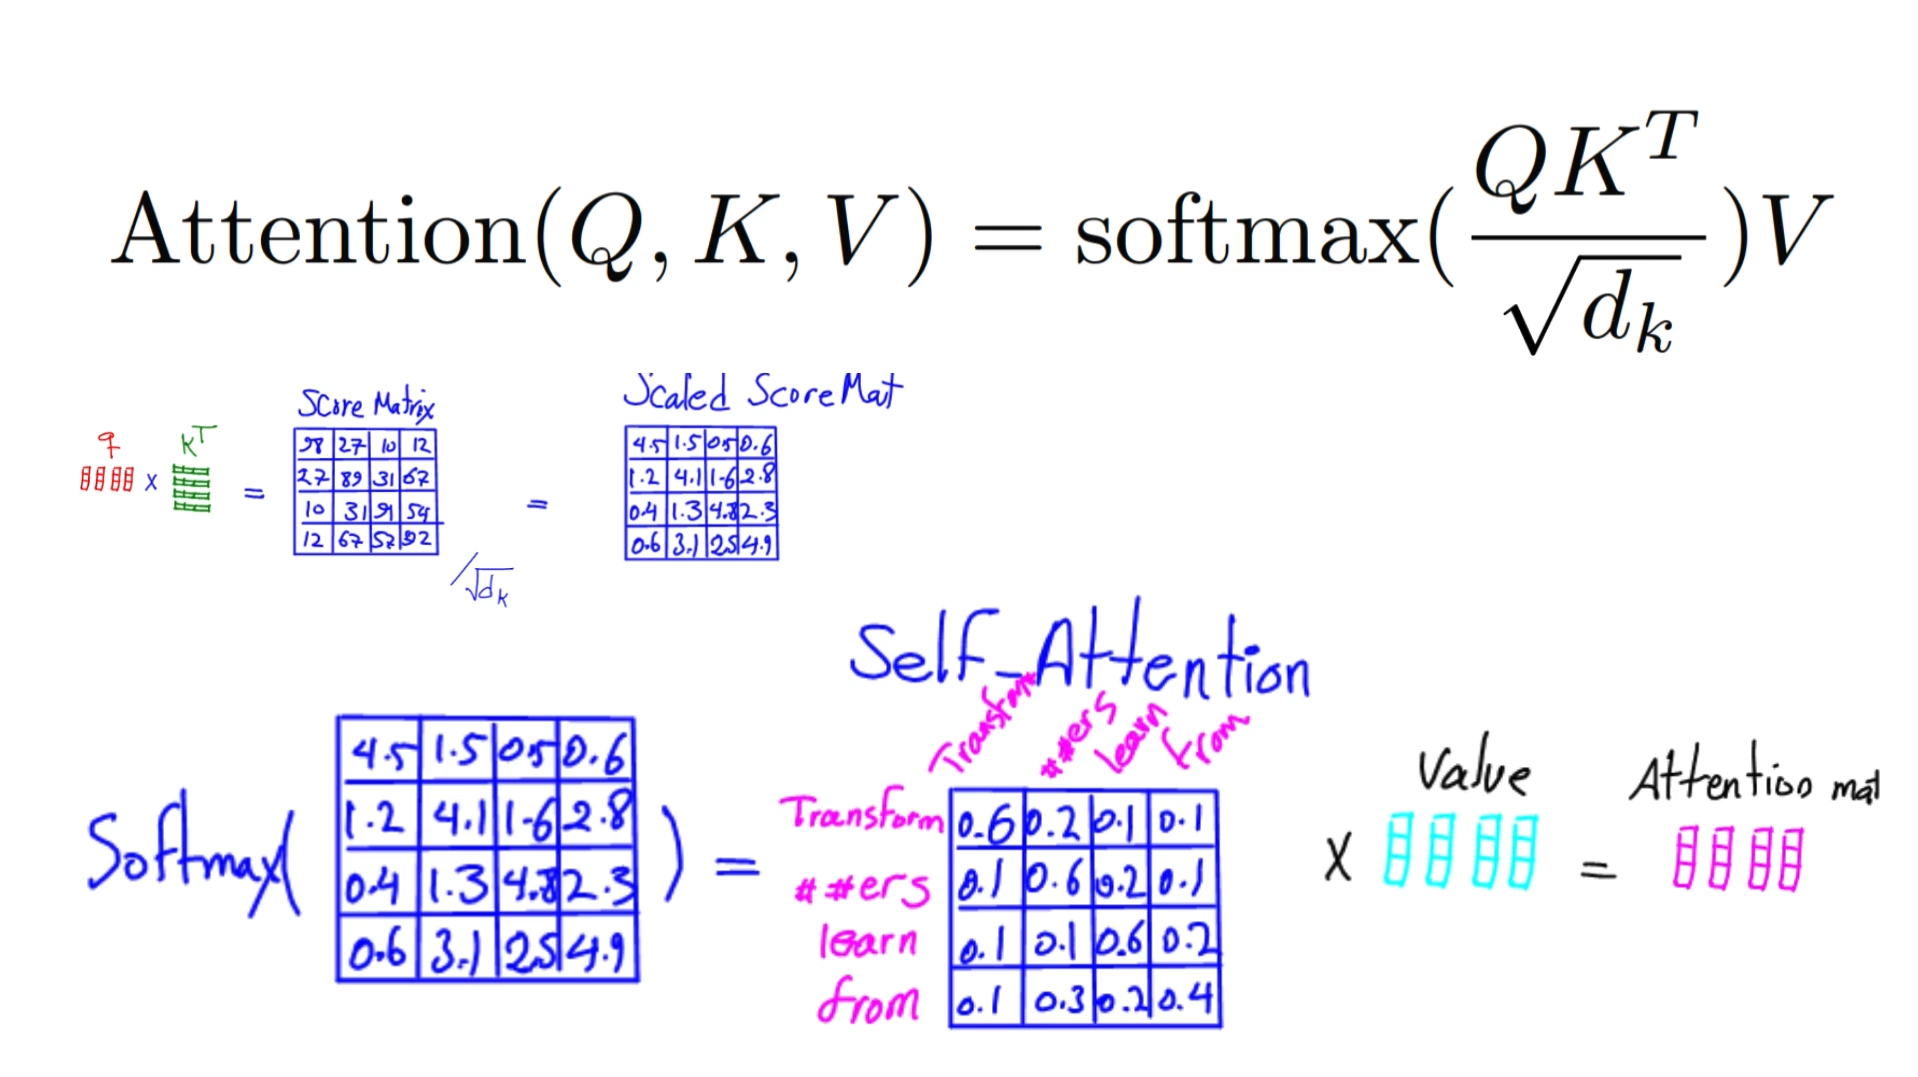

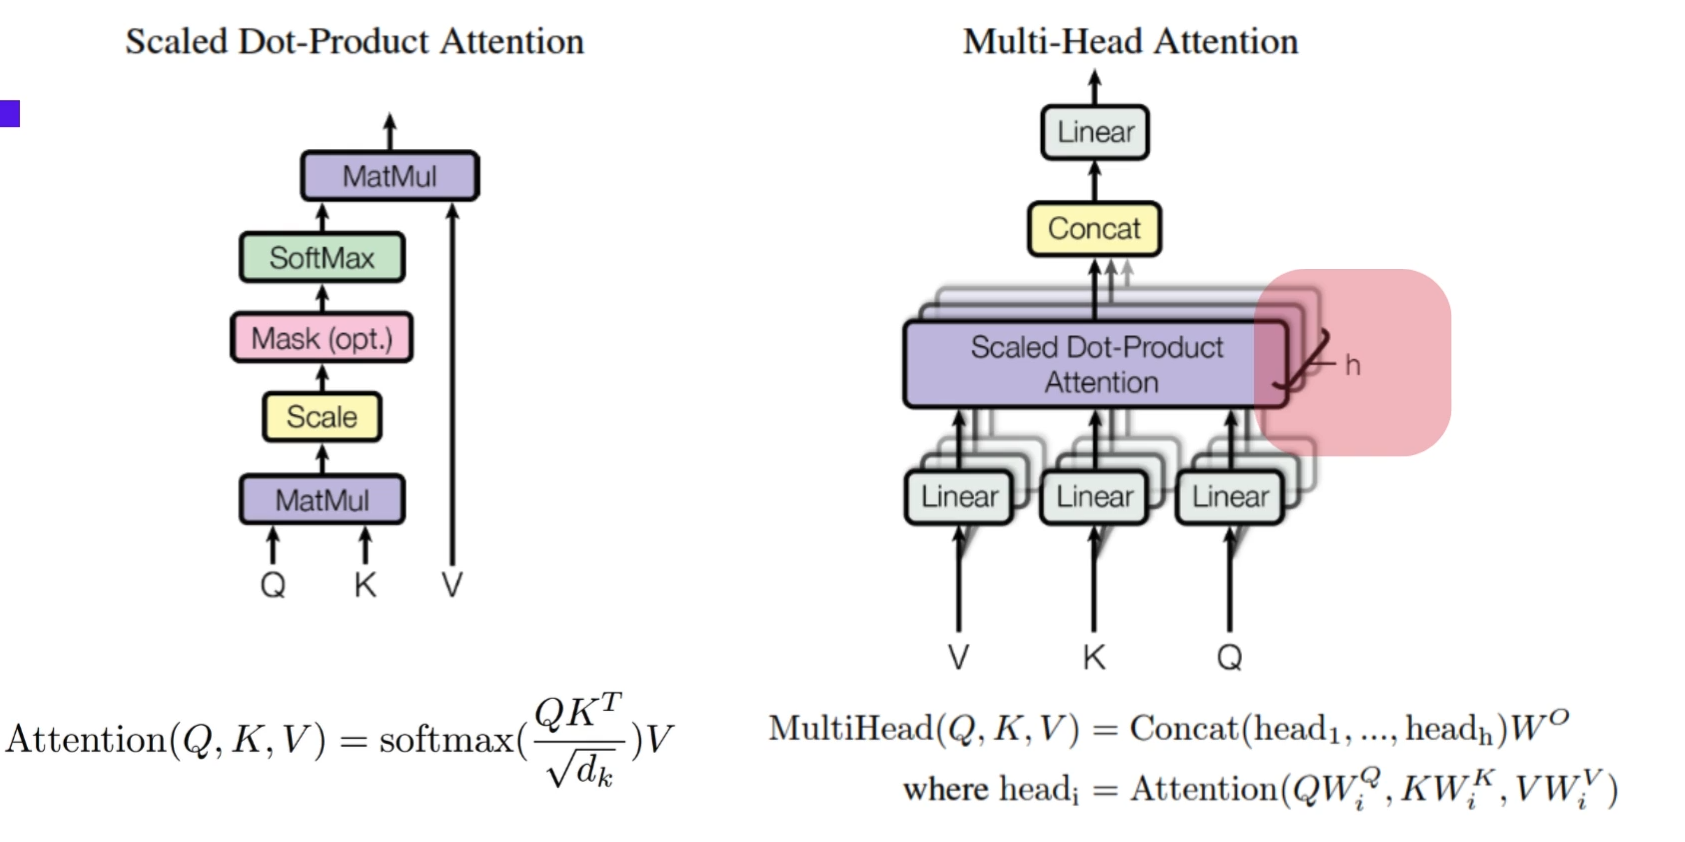

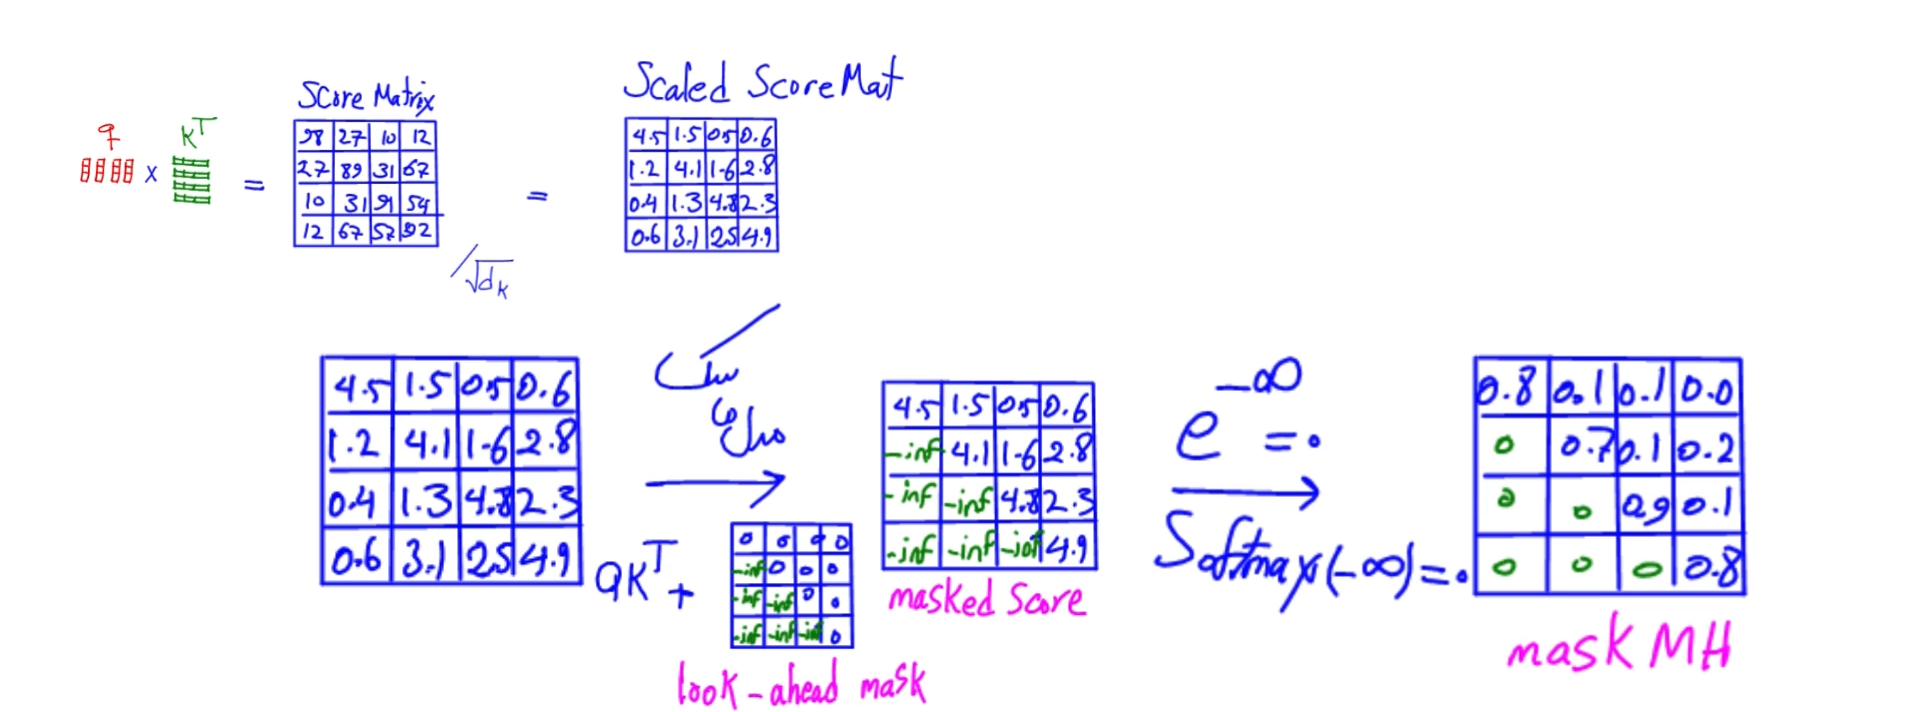

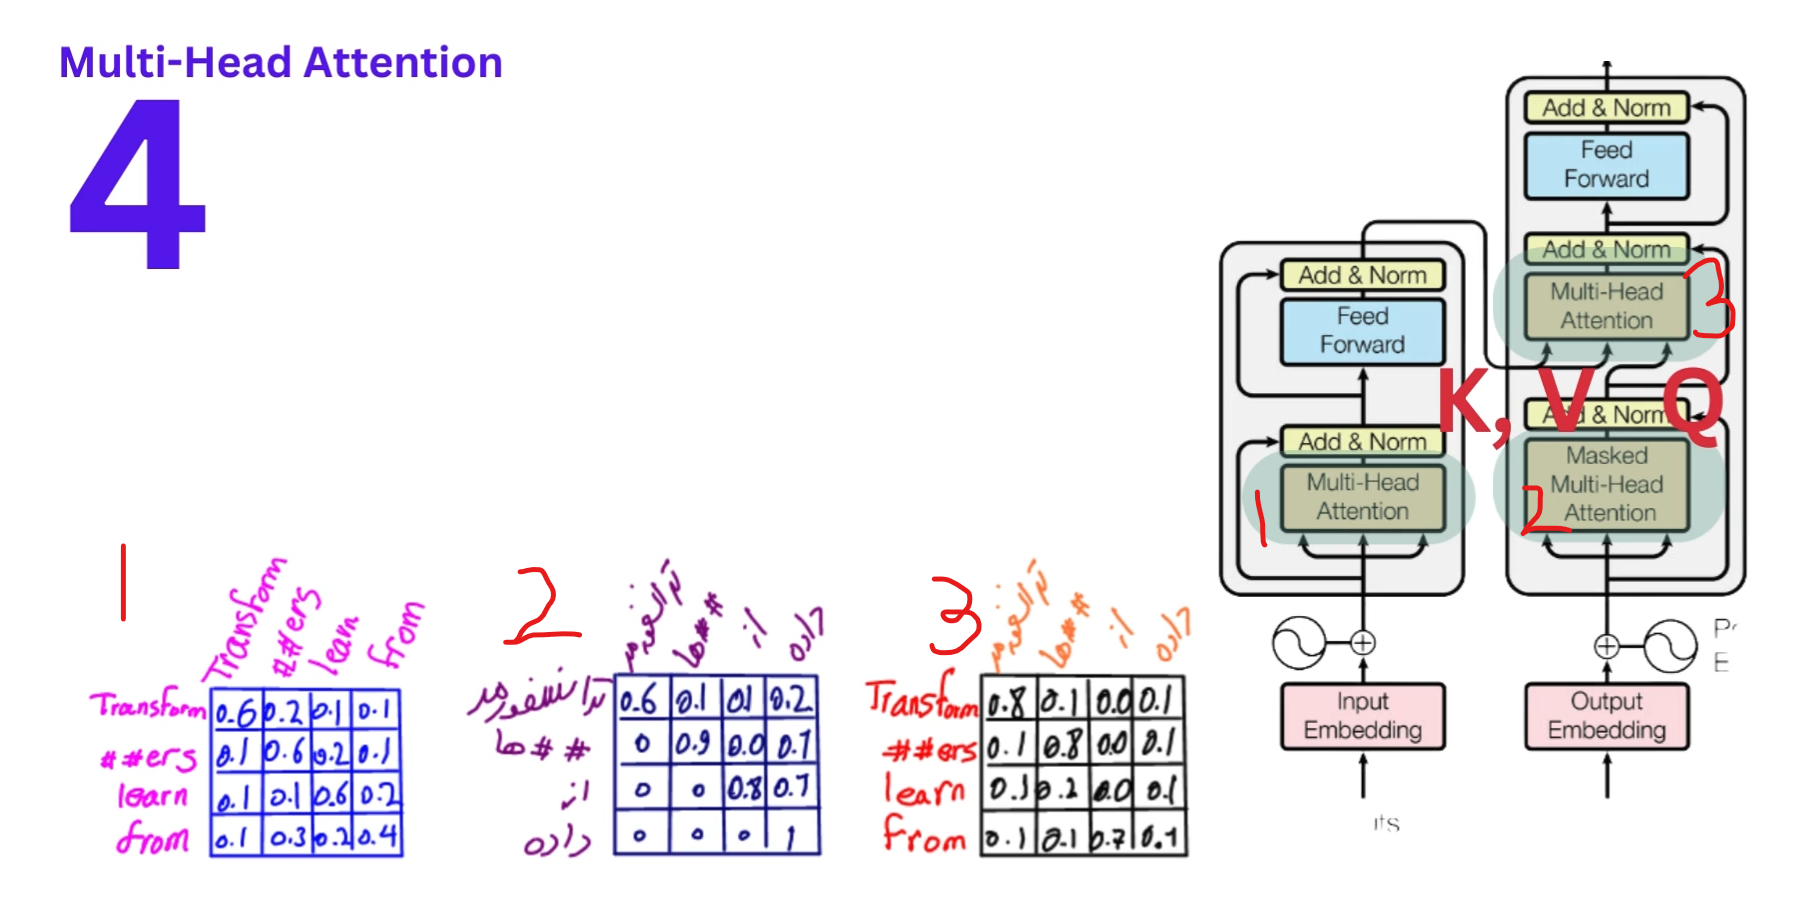

The 3rd muti head attention inputs are from 2 sides : so we call it Encoder decoder attention (or cross-attention) : \

The **3rd multi-head attention layer** in the decoder block (cross-attention) receives inputs from **two different sources**. This is a critical feature of Transformers' encoder-decoder architecture. Here's the breakdown:

---

### **Decoder's Cross-Attention Layer Inputs**
| Input Source          | Role          | Content Origin             | Purpose                          |
|-----------------------|---------------|----------------------------|----------------------------------|
| **1. Decoder Side**   | **Queries (Q)** | Current decoder state      | Asks: "What should I focus on now?" |
| **2. Encoder Side**   | **Keys (K)**<br>**Values (V)** | Final encoder output       | Provides: "Here's the source context to query" |

---

### **Visual Workflow**

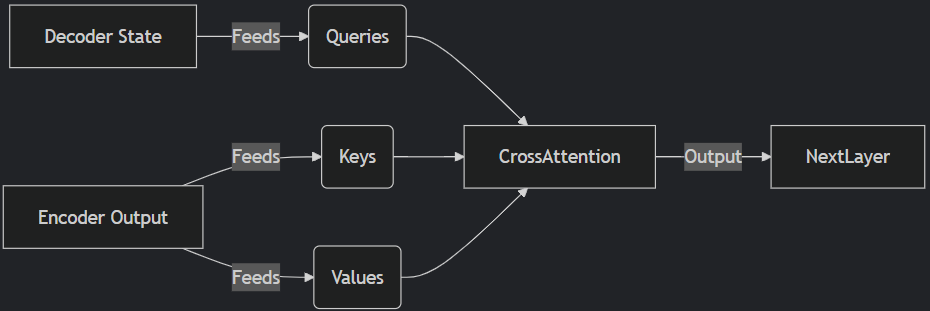

---

### **Step-by-Step Explanation**
1. **Encoder Final Output**  
   - After processing the full input sequence (e.g., English sentence), the encoder outputs a **context-rich representation** for each token.  
   - This becomes the permanent `(Key, Value)` pair bank:  
     ```
     K_encoder = [K_transform, K_##ers, K_learn, ...]
     V_encoder = [V_transform, V_##ers, V_learn, ...]
     ```

2. **Decoder Current State**  
   - At decoding step `t`, the decoder has generated tokens `[START], token₁, ..., tokenₜ₋₁`  
   - Its current hidden state becomes the **Query (Qₜ)**  
     ```
     Qₜ = DecoderState("START token₁ ... tokenₜ₋₁")
     ```

3. **Cross-Attention Operation**  
   ```
   Attention(Qₜ, K_encoder, V_encoder) = softmax(Qₜ·K_encoderᵀ/√dₖ) · V_encoder
   ```
   - **Qₜ** asks: "Which source tokens are most relevant RIGHT NOW?"  
   - **K_encoder/V_encoder** answer: "Here's what the source contains"  

---

### **Real Translation Example**
**Input Sentence (Encoder)**: `"Transformers learn from data"`  
**Decoder at Step 3**: Generated `[START] ترنسفورمر ها` → Now predicting `"از"` (Persian for "from")  

1. **Query (Q)**:  
   - Represents: `"[START] ترنسفورمر ها"`  
   - Asks: *"What in the source corresponds to the next particle?"*  

2. **Keys/Values (K/V)**:  
   - Encoder's memory of `["Transformers", "learn", "from", "data"]`  
   - `K_learn`/`V_learn` = "acquire knowledge"  
   - `K_from`/`V_from` = "source/origin marker"  

3. **Attention Result**:  
   - Q strongly matches `K_from` (high weight) → Output focuses on `V_from`  
   → Decoder predicts `"از"` (correct translation of "from")  

---

### **Why Two-Sided Input Matters**
1. **Alignment**:  
   - Simulates human translation: Glance at source while writing target  
2. **Dynamic Focus**:  
   - Different decoder steps query different encoder parts:  
     - Step 1 (`[START]`): Focuses on `"Transformers"`  
     - Step 4: Might focus on `"data"`  
3. **Context Preservation**:  
   - Encoder's full context always available (no long-range degradation)  

> "Cross-attention is the decoder's 'search engine' - queries its question against the encoder's indexed knowledge base."

---

### **Contrast with Earlier Layers**
| Layer                | Q Source       | K/V Source       | Type          |
|----------------------|----------------|------------------|---------------|
| **Encoder Self-Attn** | Encoder tokens | Encoder tokens   | Self-attention|
| **Decoder Masked Attn**| Decoder tokens | Decoder tokens   | Masked self-attn |
| **Decoder Cross-Attn**| Decoder state  | Encoder output   | Cross-attention |

---

**Key Insight**: This two-sided input is what allows Transformers to perform tasks like translation - the decoder dynamically "consults" the encoded source while generating each token!

## Prerequisite for component 5 (vanishing gradient)
# Vanishing Gradient Problem

The **vanishing gradient problem** occurs when gradients become extremely small during backpropagation in deep neural networks. This prevents weights in early layers from updating effectively.

# Chain Rule Multiplication

During backpropagation, gradients are calculated using the **chain rule**:

$$
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial z_3} \cdot \frac{\partial z_3}{\partial z_2} \cdot \frac{\partial z_2}{\partial z_1} \cdot \frac{\partial z_1}{\partial w_1}
$$

Where:
- Each term $\frac{\partial z_{i+1}}{\partial z_i} = w_i \cdot \sigma'(z_i)$
- $\sigma'(z_i)$ is the derivative of the sigmoid function

**Key Problem**:  
When $|w_i| < 1$ and $\sigma'(z_i)$ is small (always ≤ 0.25 for sigmoid), the repeated multiplication:

$$w_i \cdot \sigma'(z_i) \cdot w_{i-1} \cdot \sigma'(z_{i-1}) \cdots$$

causes gradients to shrink exponentially, becoming **near zero** in early layers.

---
---
# Simple Example :

## Network Setup:
- **Input**: $x = 2.0$
- **True Output**: $y_{\text{true}} = 0.5$
- **Weights**: $w_1 = 0.6$, $w_2 = 0.4$, $w_3 = 0.3$
- **Biases**: $b_1 = 0.1$, $b_2 = 0.2$, $b_3 = 0.15$
- **Activation**: Sigmoid $\sigma(z) = \frac{1}{1 + e^{-z}}$
- **Loss**: Mean Squared Error $L = (y_{\text{true}} - y_{\text{pred}})^2$

---

## Step 1: Forward Pass

1. **Layer 1**:  
   $$
   \begin{align*}
   z_1 &= w_1 \cdot x + b_1 = 0.6 \cdot 2.0 + 0.1 = 1.3 \\
   a_1 &= \sigma(z_1) \approx 0.785
   \end{align*}
   $$

2. **Layer 2**:  
   $$
   \begin{align*}
   z_2 &= w_2 \cdot a_1 + b_2 \approx 0.4 \cdot 0.785 + 0.2 \approx 0.514 \\
   a_2 &= \sigma(z_2) \approx 0.626
   \end{align*}
   $$

3. **Output Layer**:  
   $$
   \begin{align*}
   z_3 &= w_3 \cdot a_2 + b_3 \approx 0.3 \cdot 0.626 + 0.15 \approx 0.338 \\
   y_{\text{pred}} &\approx 0.584
   \end{align*}
   $$

4. **Loss**:  
   $$L \approx (0.5 - 0.584)^2 \approx 0.007056$$

---

## Step 2: Backward Pass (Gradients)

Sigmoid derivative: $\sigma'(z) = \sigma(z)(1-\sigma(z))$

1. **Output Layer (Layer 3)**:
   $$
   \frac{\partial L}{\partial z_3} = (0.584 - 0.5) \cdot [0.584 \cdot (1 - 0.584)] \approx 0.0204
   $$

2. **Layer 2**:
   $$
   \frac{\partial L}{\partial z_2} = 0.0204 \cdot 0.3 \cdot [0.626 \cdot (1 - 0.626)] \approx 0.00143
   $$

3. **Layer 1**:
   $$
   \frac{\partial L}{\partial z_1} = 0.00143 \cdot 0.4 \cdot [0.785 \cdot (1 - 0.785)] \approx 0.000097
   $$

---

## Gradient Values:

| Layer | Gradient $\left(\frac{\partial L}{\partial z}\right)$ |
|-------|------------------------------------------------------|
| 3     | 0.0204                                               |
| 2     | 0.00143                                              |
| 1     | **0.000097** (Vanishing!)                            |

---

## Why Gradients Vanish:
- Sigmoid derivatives $\leq 0.25$
- Chain rule multiplies small numbers repeatedly:  
  $0.25 \times 0.4 \times 0.25 = 0.025$ (exponential shrinkage)

## Solutions:
1. **ReLU activation**: $\text{ReLU}(z) = \max(0, z)$ (derivative = 1 for $z > 0$)
2. **Proper weight initialization** (He/Xavier)
3. **Batch Normalization**
4. **Residual connections** (ResNet)

## 5. Add & Norm Component

The **Add & Norm** layer combines two operations after each sub-layer (Multi-Head Attention or Feed Forward):

<div align="center">
<img src="https://miro.medium.com/v2/resize:fit:1400/1*3fA77_mLNiJTSgZFhYnU0Q.png" width="300" alt="Residual Connection Diagram">
</div>

### 1. Add (Residual Connection)
- **Operation**:  
  $\text{Output} = \text{Input} + \text{Sublayer}(\text{Input})$
- **Why it prevents vanishing gradients**:  
  The gradient gets a **direct path** back:  
  $$\frac{\partial \text{Loss}}{\partial \text{Input}} = \frac{\partial \text{Loss}}{\partial \text{Output}} \cdot \left(1 + \frac{\partial \text{Sublayer}}{\partial \text{Input}}\right)$$  
  The "+1" means gradients flow unchanged even if $\frac{\partial \text{Sublayer}}{\partial \text{Input}}$ is small.

### 2. Layer Normalization
- **Operation**:  
  $\text{Output} = \gamma \cdot \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} + \beta$  
  (Normalizes across feature dimension)
- **Purpose**: Stabilizes activations and gradients

### Key Benefits
| Component          | Impact                                                                 |
|--------------------|------------------------------------------------------------------------|
| Residual Connection | Prevents exponential gradient decay in deep networks                  |
| LayerNorm          | Reduces training instability from covariate shift                    |
| Together           | Enable 100+ layer transformers (original paper used 64 layers)      |

# 6. Feed Forward (FFN) in Transformers:  
- **Structure**: Two linear layers with ReLU activation in between.  
- **Role**: Parallel processing, extracts non-linear features.  
- **Activation**: Usually ReLU.  


# 7. Last Linear Layer in Transformers

- **Purpose**: Converts hidden state dimensions to vocabulary size for prediction.  
- **Input**: Final decoder output (shape: `d_model`).  
- **Output**: Probability distribution over vocabulary (shape: `vocab_size`).  
- **Components**:  
  - Linear transformation: \( \text{output} = \text{hidden\_state} \times W + b \).  
  - Softmax activation for probabilities.  
- **Application**: Maps contextual embeddings to token predictions in tasks like translation or text generation.  

**Example**:  
If `d_model = 512` and `vocab_size = 30000`, the linear layer transforms a 512-dimensional hidden state into a 30000-dimensional vector, where each element represents the score for a token in the vocabulary. Softmax converts these scores into probabilities.  

**Vocabulary Size (`vocab_size`)**: The total number of unique tokens in the model's vocabulary. The output dimension of the last linear layer matches this size.

#8. Softmax on FNN Output

- **Purpose**: Converts FNN scores to probabilities.  
- **Input**: FNN result.  
- **Output**: Probability distribution.  
- **Example**:  
  Input `[3.0, 1.0, 0.5]` → Output `[0.8, 0.15, 0.05]`.

**Cross-Entropy Loss**  

- **Purpose**: Measures the difference between predicted probabilities and true labels in classification tasks.  




# 📘 Understanding Transformer Structures:

### Why Encoders Are Bidirectional, Decoders Are Unidirectional — and How That Shapes Their Applications

---

## 🔹 Goal

This booklet explains how the **internal structure** of Transformer models (encoders and decoders) defines their **attention directionality**, and why that directly influences whether a model is suited for **understanding** or **generation** tasks.

---

## 🔹 Encoder-Only → Bidirectional Attention

### ✅ Structure:

* The encoder stack receives the **entire input sequence at once**.
* Each token attends to **every other token**, with **no restrictions**.
* Attention is computed using a **full self-attention matrix**:

  $$
  A_{ij} \ne 0 \quad \text{for all } i, j
  $$

### ✅ Result:

* This produces **bidirectional context awareness**.
* Tokens can “see” both **left and right** — full context.
* **Perfect for understanding tasks**.

### ✅ Example:

* **BERT** is an encoder-only model trained to **predict masked words** using full context.

---

## 🔹 Decoder-Only → Unidirectional (Causal) Attention

### ✅ Structure:

* The decoder processes tokens **sequentially**.
* A **causal mask** ensures that each token can **only attend to previous tokens** (no future leakage).
* The attention matrix is **lower-triangular**:

  $$
  A_{ij} = 0 \quad \text{if } j > i
  $$

### ✅ Result:

* This creates **unidirectional (left-to-right)** attention.
* Necessary for **generating** text step-by-step — one token at a time.

### ✅ Example:

* **GPT** is a decoder-only model trained to **predict the next token** given all previous ones.

---

## 📊 Comparison Table: Encoder vs Decoder Structure and Impact

| Feature                   | **Encoder (BERT)**             | **Decoder (GPT)**              |
| ------------------------- | ------------------------------ | ------------------------------ |
| Stack Used                | Encoder-only                   | Decoder-only                   |
| Self-Attention Type       | Full (unmasked)                | Masked (causal)                |
| Attention Direction       | **Bidirectional**              | **Unidirectional** (L → R)     |
| Attends to Future Tokens? | ✅ Yes                          | ❌ No                           |
| Input Processing          | All tokens at once             | One token at a time            |
| Training Objective        | Masked Language Modeling (MLM) | Causal Language Modeling (CLM) |
| Ideal for                 | **Understanding**              | **Generation**                 |
| Example Models            | BERT, RoBERTa                  | GPT, GPT-2/3/4                 |

---

## 🔸 Summary

The **architecture dictates attention behavior**, which in turn determines a model’s **natural application**:

* **Encoders** (bidirectional) → best for **understanding** and analysis tasks.
* **Decoders** (unidirectional) → best for **generation** and autoregressive tasks.

> 🧠 Structure → Attention → Function



### 🔹 What Are Multimodal Models?

**Multimodal models** are AI models that can **process and combine information from multiple types of input (modalities)** — such as:

* 📝 **Text**
* 🖼️ **Images**
* 🔊 **Audio**
* 🎥 **Video**
* 📈 **Structured data**

---

### 🔸 Why “Multimodal”?

“Modalities” refer to **different forms of data**.
A **multimodal model** learns to understand and connect these different data types in a single system.


## MaxPooling  vs. GlobalMaxPooling

| Feature              | MaxPooling    | GlobalMaxPooling           |
| -------------------- | ------------- | -------------------------- |
| Operation Scope      | Local windows | Entire feature map         |
| Output Shape         | Smaller grid  | 1 value per channel        |
| Preserves Structure? | ✅ Yes         | ❌ No                       |
| Use Case             | Downsampling  | Flatten for classification |



## 📘 Why do we need to One-Hot Encode of last layer in Neural Network Classification

---

### 🔹 Step 1: One-Hot Encoding (Target Labels)

Before training, class labels (e.g., `cat`, `dog`, `rabbit`) are converted into **one-hot vectors**:

| Label  | One-hot vector |
| ------ | -------------- |
| Cat    | `[1, 0, 0]`    |
| Dog    | `[0, 1, 0]`    |
| Rabbit | `[0, 0, 1]`    |

✅ This tells the network:

> “The correct class is **only one of them**, and the rest should be 0.”

---

### 🔹 Step 2: Output Layer of the Network

* The last layer typically outputs **raw scores (logits)** — e.g., `[2.5, 1.2, 0.3]`
* These are **not probabilities** yet.

---

### 🔹 Step 3: Softmax Activation

Softmax turns those raw scores into **probabilities**:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

Example:

```
logits:    [2.5, 1.2, 0.3]
softmax:   [0.75, 0.18, 0.07]
```

✅ Now the output sums to 1 — like a probability distribution.

---

### 🔹 Step 4: Loss Function — Cross-Entropy

* Compares the predicted probabilities (from softmax) with the one-hot label.
* Penalizes the model if the correct class doesn't have high probability.

Example:

```python
true = [0, 1, 0]        # true class is 'dog'
pred = [0.75, 0.18, 0.07]  # predicted probs

cross_entropy_loss = -log(0.18)
```

---

### 🔸 Summary Table

| Component         | Role                                 |
| ----------------- | ------------------------------------ |
| One-hot encoding  | Represents true labels               |
| Last layer output | Produces raw scores (logits)         |
| Softmax           | Converts logits to probabilities     |
| Cross-entropy     | Measures error between pred and true |

---

### ✅ Final Output (After Training)

After training, the model might output:

```
[0.01, 0.96, 0.03] → predicted class = 1 (dog)
```

Which matches the one-hot label `[0, 1, 0]`.


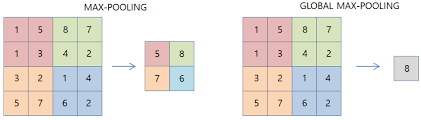



## 📘 Why Padding Matters in Text Models

### 🔹 1. **Uniform Lengths for Batching**

* Neural networks (especially Transformers) expect inputs to be in **fixed-size tensors**.
* But real text has **variable lengths**.
* **Padding** (usually with a special `[PAD]` token) ensures all sequences in a batch have the **same length** — which allows for:

  * Efficient batching
  * Parallel computation on GPUs/TPUs

---

### 🔹 2. **Enables Efficient Matrix Operations**

* Hardware acceleration (like cuBLAS) relies on fixed-size matrices.
* Padding removes the need to process each sentence one-by-one.

---

### 🔹 3. **Supports Attention Masking**

* Padding tokens carry **no meaning**.
* Attention masks are used to **ignore padded positions** so the model focuses only on the actual words.
* Without masking, the model might attend to meaningless `[PAD]` tokens and learn incorrect patterns.

---

### 🔹 4. **Positional Embeddings Stay Consistent**

* Transformers add position info to each token.
* Padding ensures that real tokens **always fall at the same positions** within a batch — important for capturing the true structure of the sentence.

---

### ✅ Summary

> Padding is crucial for **speed**, **parallelism**, and **accuracy** in text models.
> It ensures uniform input sizes, enables correct masking, and supports efficient learning. \

---
## Padding types for sequential (ex: text) data:


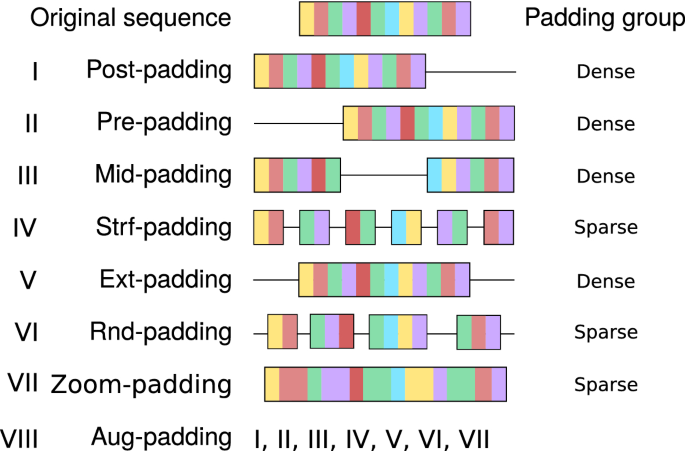

post-padding is the best type of padding, best practice.

In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.layers import Embedding, Input, Dense, SimpleRNN, LSTM, MultiHeadAttention, LayerNormalization, Dropout, GRU, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model

import matplotlib.pyplot as plt
import numpy as np



In [23]:
maxlen=100
num_words=10000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=num_words,  # "Only keep the top 10,000 most frequent words. If a word is not in the top 10,000, replace it with a special token, usually 2 (which stands for [OOV])."
    test_split=0.2,   # 20% of data for testing
    skip_top=5,       # tells Keras to ignore the most frequent words in the dataset when loading it.
    maxlen=maxlen        # Only keep sequences with max length of 100

)
print(f'Number of sequences for train data:{len(train_data)}')
print(f'Number of sequences for test data:{len(test_data)}')


Number of sequences for train data:4777
Number of sequences for test data:1195


Great! Let’s break down the `skip_top` argument of `reuters.load_data()` in a simple and clear way.

---

### 📌 What is `skip_top`?

The `skip_top` argument tells Keras to **ignore the most frequent words** in the dataset when loading it.

```python
reuters.load_data(skip_top=10)
```

This means:

> "Skip the **top 10 most common words**, and replace them with the `[OOV]` token."

---

### 🧠 Why would you skip the top words?

Because the most frequent words in any language are often **stopwords** like:

> "the", "and", "is", "of", "to", "in", ...

These words occur so often that they **don’t carry much useful meaning** for classification tasks.

By skipping them, you:

* Reduce noise
* Focus on more **informative** words (e.g., "stocks", "earnings", "oil")



In [4]:
train_data[1]

[2,
 3267,
 699,
 3434,
 2295,
 56,
 2,
 7511,
 9,
 56,
 3906,
 1073,
 81,
 5,
 1198,
 57,
 366,
 737,
 132,
 20,
 4093,
 7,
 2,
 49,
 2295,
 2,
 1037,
 3267,
 699,
 3434,
 8,
 7,
 10,
 241,
 16,
 855,
 129,
 231,
 783,
 5,
 2,
 587,
 2295,
 2,
 2,
 775,
 7,
 48,
 34,
 191,
 44,
 35,
 1795,
 505,
 17,
 12]

### Decoding train_data[1] sequence

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = '[PAD]'
reverse_word_index[1] = '[START]'
reverse_word_index[2] = '[OOV]'
reverse_word_index[3] = '[UNUSED]'

decoded = ' '.join([reverse_word_index.get(i, '?') for i in train_data[1]])
print(decoded)


550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
[OOV] generale de banque sa lt [OOV] br and lt heller overseas corp of chicago have each taken 50 pct stakes in [OOV] company sa [OOV] factors generale de banque said in a statement it gave no financial details of [OOV] transaction sa [OOV] [OOV] turnover in 1986 was 17 5 billion belgian francs reuter 3


### padding_sequences tutorial

In [6]:

sequences = [
    [1, 2, 3],             # Short
    [4, 5, 6, 7, 8],       # Long
    [9],                  # Very short
]
padded = pad_sequences(
    sequences,
    maxlen=4,            # Desired fixed length
    padding='post',      # Add zeros **after** each sequence
    truncating='post'    # Cut **end** of sequences if too long
)

print(padded)


[[1 2 3 0]
 [4 5 6 7]
 [9 0 0 0]]


In [39]:
train_data = pad_sequences(train_data, maxlen=maxlen, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=maxlen, padding='post', truncating='post')


In [7]:
num_classes = len(train_labels)
train_labels = to_categorical(train_labels,num_classes)
test_labels = to_categorical(test_labels,num_classes)
train_labels[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:

def transformer_block(inputs, num_head, ff_dim, dropout_rate=0.1):

    attn_out = MultiHeadAttention(num_heads=num_head, key_dim=64)( #output shape (batch, seq length, embedding dimension)
        query=inputs,                                              # Attention is all u need!
        value=inputs,
        key=inputs  # key = value = query → SELF-attention
    ) # note that its equal to (inputs,inputs). refer to default values of args
    attn_out = Dropout(dropout_rate)(attn_out)

    # Residual connection + Layer Norm (1st layer norm)
    out1 = LayerNormalization(epsilon=1e-3)(inputs + attn_out)

    # Feedforward network (2 Dense layers)
    ff = Dense(ff_dim, activation='relu')(out1)       # First Dense
    ff = Dense(inputs.shape[-1])(ff)                  # Second Dense, to match original [embedding] dim (If inputs is a 3D tensor with shape (batch_size, sequence_length, embedding_dim),)
    ff = Dropout(dropout_rate)(ff)

    # Residual connection + Layer Norm (2nd layer norm)
    out2 = LayerNormalization(epsilon=1e-3)(out1 + ff)

    return out2


MHA input, output shape : \

| Component     | Shape                                 |
| ------------- | ------------------------------------- |
| Input to MHA  | `(batch_size, seq_length, embed_dim)` |
| Output of MHA | `(batch_size, seq_length, embed_dim)` |

(Batch, Length of sequence(number of tokens), Embedding size) = (B, T, D)

---

look at this table one after other too.

| Shape In    | Layer                | Shape Out   | Notes                   |
| ----------- | -------------------- | ----------- | ----------------------- |
| `(B, T, D)` | `Dense(U)`           | `(B, T, U)` | Applied per time step   |
| `(B, T, D)` | `GlobalAvgPool1D()`  | `(B, D)`    | Collapses sequence      |
| `(B, D)`    | `Dense(num_classes)` | `(B, C)`    | Final classifier output |

Therefore for classfication: \
you might **pool or flatten** **after** the Transformer block:



```python

x = transformer_block(...)  # shape: (batch, seq_len, embed_dim)

x = GlobalAveragePooling1D()(x)  # → shape: (batch, embed_dim)

x = Dense(num_classes, activation='softmax')(x)

```

# Are Dense layers flatten or 2d ?!

---

### ✅ You're thinking:

> *“Aren’t Dense layers supposed to work on flat vectors?”*
> Like:

```python
Dense(64)([batch_size, features]) → [batch_size, 64]
```

---

### 🔍 But here’s the key:

**Keras `Dense` layers are fully compatible with 3D inputs** — and they apply the same transformation **independently** across all time steps.

So if your input has shape:

```python
(batch_size, sequence_length, embedding_dim)
```

Then applying `Dense(units)` will output:

```python
(batch_size, sequence_length, units)
```

Each "word" (or token) vector is passed through the same Dense layer independently.

---

### 📦 Example:

```python
from keras.layers import Dense
import tensorflow as tf

x = tf.random.normal(shape=(32, 20, 64))  # 32 sequences, each of length 20, each word is 64-dim
dense = Dense(128)
y = dense(x)  # Output shape: (32, 20, 128)
```

---

### 🧠 So in Transformer blocks:

* We **do not flatten** the sequence.
* Instead, we keep it as a 3D tensor so each position (token) is processed in parallel.
* The `Dense` layer just applies a learned transformation at every position:

  ```
  [w₁] → Dense → [w₁′]
  [w₂] → Dense → [w₂′]
  ...
  ```

---

### 🔄 Want to flatten?

Yes, for **classification**, you might **pool or flatten** **after** the Transformer block:

```python
x = transformer_block(...)  # shape: (batch, seq_len, embed_dim)
x = GlobalAveragePooling1D()(x)  # → shape: (batch, embed_dim)
x = Dense(2, activation='softmax')(x)
```

---

### ✅ TL;DR:

| Shape In    | Layer                | Shape Out   | Notes                   |
| ----------- | -------------------- | ----------- | ----------------------- |
| `(B, T, D)` | `Dense(U)`           | `(B, T, U)` | Applied per time step   |
| `(B, T, D)` | `GlobalAvgPool1D()`  | `(B, D)`    | Collapses sequence      |
| `(B, D)`    | `Dense(num_classes)` | `(B, C)`    | Final classifier output |

Let me know if you'd like a visual or step-by-step toy example!



### 🧠 Why two sets of brackets?
Refer to callable objects \

When you write:

```python
MultiHeadAttention(...)(inputs, inputs)
```

you’re doing **two separate operations**:

---

### 🔹 1st set of parentheses:

```python
MultiHeadAttention(num_heads=..., key_dim=...)
```

➡️ This **creates the layer object** (an instance of `MultiHeadAttention`).

It's like saying:

```python
attention_layer = MultiHeadAttention(num_heads=..., key_dim=...)
```

---

### 🔹 2nd set of parentheses:

```python
attention_layer(inputs, inputs)
```

➡️ This is **calling the layer** with the input tensors, i.e., applying the layer to your data — same as calling a function.

---

### ✅ So this:

```python
output = MultiHeadAttention(...)(inputs, inputs)
```

Is shorthand for:

```python
mha = MultiHeadAttention(num_heads=..., key_dim=...)
output = mha(inputs, inputs)
```



In [41]:
def build_model(input_shape=maxlen, model_type, num_classes, num_words, embed_dim):
    inputs = Input(shape=input_shape)  # shape = (len_seq,)

    # Embed token IDs into dense vectors
    x = Embedding(input_dim=num_words, output_dim=embed_dim)(inputs)  # shape = (batch, len_seq, 64)

    if model_type == 'rnn':
        x = SimpleRNN(64)(x)   # ✅ pass embedded x

    elif model_type == 'gru':
        x = GRU(64)(x)

    elif model_type == 'lstm':
        x = LSTM(64)(x)

    elif model_type == 'transformer':
        x = transformer_block(x, num_head=4, ff_dim=128)
        x = GlobalAveragePooling1D()(x)

    else:
        raise ValueError(f"Unknown model type: {model_type}")

    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)


In [55]:
model_types = ['rnn', 'gru', 'lstm','transformer']
results = {}

# Shared hyperparameters
epochs = 10
batch_size = 64
embed_dim = 64
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

for model_type in model_types:
    print(f'\n🧪 Training model: {model_type.upper()}')

    model = build_model(
        input_shape=(maxlen,),
        model_type=model_type,
        num_classes=num_classes,
        num_words=num_words,
        embed_dim=embed_dim
    )

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_data, train_labels,
        validation_data=(test_data, test_labels),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=1
    )

    # Final test accuracy
    test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=0)
    print(f"✅ {model_type.upper()} Test Accuracy: {test_acc:.4f}")

    # Store results
    results[model_type] = {
        "history": history.history,
        "test_acc": test_acc
    }



🧪 Training model: RNN
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 66ms/step - accuracy: 0.4200 - loss: 6.4797 - val_accuracy: 0.5146 - val_loss: 2.0553
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5040 - loss: 1.9968 - val_accuracy: 0.5146 - val_loss: 1.9439
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.4963 - loss: 1.9339 - val_accuracy: 0.5146 - val_loss: 1.9240
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.4930 - loss: 1.9458 - val_accuracy: 0.5146 - val_loss: 1.9188
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5001 - loss: 1.8594 - val_accuracy: 0.5146 - val_loss: 1.9125
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.4931 - loss: 1.9262 - val_accuracy: 0.5146 - val_loss: 1.9107
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.4966 - loss: 1.9024 - val_accuracy: 0.5146 - val_loss: 1.9130
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.4971 - loss: 1.9107 - 

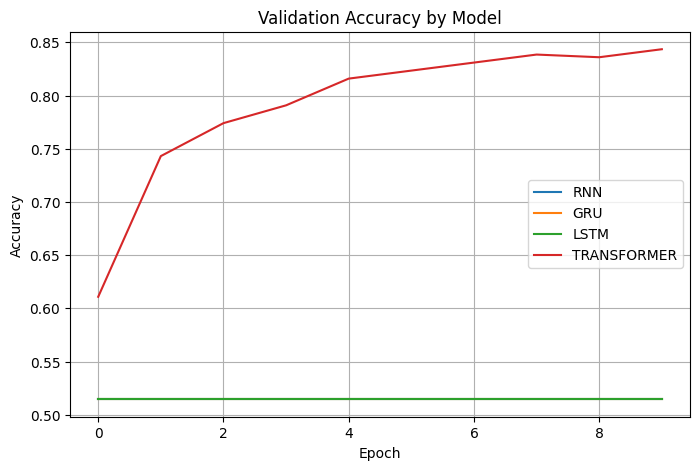

In [56]:

plt.figure(figsize=(8,5))
for m, r in results.items():
    plt.plot(r['history']['val_accuracy'], label=m.upper())

plt.title("Validation Accuracy by Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


## DNG :
* **Validation set = a split from training data** used during training
* **Test set = completely separate data** used only after training finishes